In [4]:
# Importing dependencies
import pandas as pd
import numpy as np

import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib as plt
import seaborn as sns

In [5]:
mortgage_merged = pd.read_csv('https://raw.githubusercontent.com/rparikh16/Data-Analysis-Project---Group-12/main/Canada_Mortgages_filtered.csv')
mortgage_merged.head()

,Unnamed: 0,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,0,0.3550,219191.50,0.314292
1,1,0.3500,231196.75,0.290257
2,2,0.3525,247453.25,0.274011
3,3,0.3500,266337.50,0.279614
4,4,0.3125,279651.75,0.248447


In [6]:
mortgage_merged.columns

Index(['Unnamed: 0', 'Mortgage_delinquency_rate', 'Average_Value_New_Loans',
       'Residential_Mortgage_Arrears_Rates'],
      dtype='object')

In [7]:
mortgage_merged = mortgage_merged.drop('Unnamed: 0', axis=1).reset_index(drop=True)
mortgage_merged

,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,0.3550,219191.50,0.314292
1,0.3500,231196.75,0.290257
2,0.3525,247453.25,0.274011
3,0.3500,266337.50,0.279614
4,0.3125,279651.75,0.248447
5,0.2875,277114.00,0.243891
6,0.2950,276762.25,0.200000
7,0.4675,282466.25,0.418389
8,0.3625,298145.00,0.306694
9,0.3400,304252.50,0.274545


In [8]:
market_indicators_merged = pd.read_csv('https://raw.githubusercontent.com/rparikh16/Data-Analysis-Project---Group-12/main/Housing_Indicators_cleaned-2.csv')
market_indicators_merged.head()

,Unnamed: 0,Unnamed: 0.1,Years,Real_Median_Household_Income,Consumer_Price_Index_Percent_Change,Labour_Force_Participation_Rate,Unemployment_Rate,Real_Disposable_Income_Percent_Change
0,7,7,2013,64600,0.938292,66.458333,7.100000,3.182510
1,8,8,2014,66300,1.906636,65.991667,6.900000,1.224499
2,9,9,2015,66400,1.125241,65.850000,6.900000,3.360780
3,10,10,2016,66100,1.428760,65.700000,7.000000,3.197338
4,11,11,2017,68100,1.673978,66.659848,7.045455,3.197338


In [9]:
market_indicators_merged = market_indicators_merged.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1).reset_index(drop=True)
market_indicators_merged

,Years,Real_Median_Household_Income,Consumer_Price_Index_Percent_Change,Labour_Force_Participation_Rate,Unemployment_Rate,Real_Disposable_Income_Percent_Change
0,2013,64600,0.938292,66.458333,7.100000,3.182510
1,2014,66300,1.906636,65.991667,6.900000,1.224499
2,2015,66400,1.125241,65.850000,6.900000,3.360780
3,2016,66100,1.428760,65.700000,7.000000,3.197338
4,2017,68100,1.673978,66.659848,7.045455,3.197338
5,2018,68400,1.673978,66.659848,7.045455,3.197338
6,2019,69300,1.673978,66.659848,7.045455,3.197338
7,2013,87500,1.436254,73.141667,4.600000,4.933587
8,2014,88400,2.566755,72.716667,4.700000,3.715266
9,2015,87900,1.153555,73.016667,6.000000,2.837896


In [10]:
final_cleaned_dataset = pd.concat([market_indicators_merged, mortgage_merged], axis=1)
final_cleaned_dataset.head()

,Years,Real_Median_Household_Income,Consumer_Price_Index_Percent_Change,Labour_Force_Participation_Rate,Unemployment_Rate,Real_Disposable_Income_Percent_Change,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,2013,64600,0.938292,66.458333,7.100000,3.182510,0.3550,219191.50,0.314292
1,2014,66300,1.906636,65.991667,6.900000,1.224499,0.3500,231196.75,0.290257
2,2015,66400,1.125241,65.850000,6.900000,3.360780,0.3525,247453.25,0.274011
3,2016,66100,1.428760,65.700000,7.000000,3.197338,0.3500,266337.50,0.279614
4,2017,68100,1.673978,66.659848,7.045455,3.197338,0.3125,279651.75,0.248447


In [11]:
final_cleaned_dataset.to_csv('final_cleaned_data.csv', index=False)

In [12]:
corrdf=final_cleaned_dataset.apply(LabelEncoder().fit_transform)
sc = StandardScaler()
corrdf = sc.fit_transform(corrdf)
corrdf=pd.DataFrame(data=corrdf,columns=final_cleaned_dataset.columns)
corr=corrdf.corr()['Mortgage_delinquency_rate']
corr[np.argsort(corr,axis=0)[::-1]]

Mortgage_delinquency_rate                 1.000000
Residential_Mortgage_Arrears_Rates        0.964244
Real_Disposable_Income_Percent_Change     0.308583
Labour_Force_Participation_Rate           0.117530
Real_Median_Household_Income             -0.141039
Unemployment_Rate                        -0.141934
Consumer_Price_Index_Percent_Change      -0.162176
Years                                    -0.239036
Average_Value_New_Loans                  -0.351025
Name: Mortgage_delinquency_rate, dtype: float64

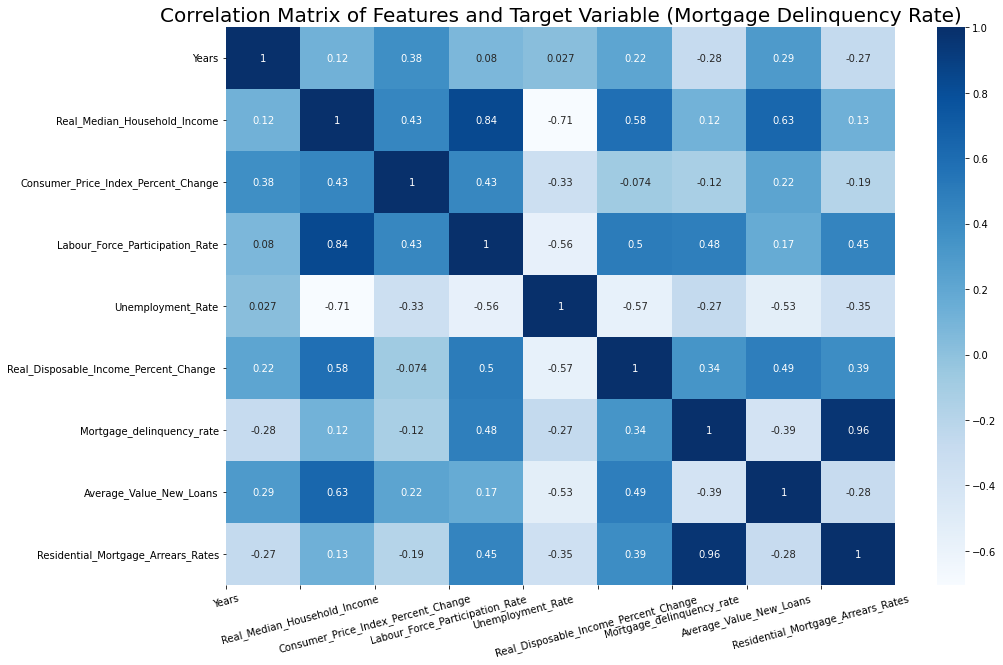

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation matrix
corr = final_cleaned_dataset.corr()

plt.figure(figsize=(15,10))

# Plot the heat map
sns.heatmap(corr, cmap="Blues", annot=True)

# Decrease space between the title and the chart
plt.subplots_adjust(top=0.9)

# Add title
plt.title('Correlation Matrix of Features and Target Variable (Mortgage Delinquency Rate)', fontsize=20)

# Rotate the feature labels to 45 degrees
labels = corr.columns
for i, label in enumerate(labels):
    angle = 15 if i % 2 == 0 else -15
    plt.xticks(np.arange(len(labels)), labels, rotation=angle)

# Show the plot
plt.show()

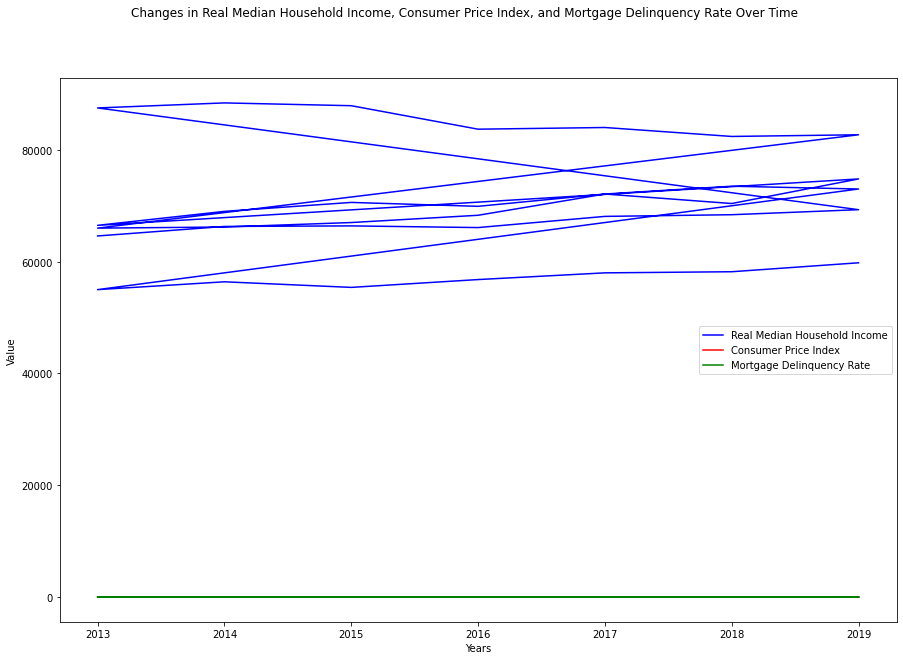

In [14]:
plt.figure(figsize=(15, 10))

# Plot the line charts
plt.plot(final_cleaned_dataset['Years'], final_cleaned_dataset['Real_Median_Household_Income'], label='Real Median Household Income', color= "Blue")
plt.plot(final_cleaned_dataset['Years'], final_cleaned_dataset['Consumer_Price_Index_Percent_Change'], label='Consumer Price Index', color= "red")
plt.plot(final_cleaned_dataset['Years'], final_cleaned_dataset['Mortgage_delinquency_rate'], label='Mortgage Delinquency Rate', color= "green")

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Value')
plt.suptitle('Changes in Real Median Household Income, Consumer Price Index, and Mortgage Delinquency Rate Over Time')


plt.legend(loc='right')

# Show the plot
plt.show()

In [15]:
import plotly.express as px
# Create a scatter plot with the hover text showing the mortgage delinquency rate
fig = px.scatter(final_cleaned_dataset, x="Real_Median_Household_Income",y="Consumer_Price_Index_Percent_Change",
                 size='Mortgage_delinquency_rate', color='Mortgage_delinquency_rate', 
                 hover_data=["Mortgage_delinquency_rate"])

# Set the size and title of the plot
fig.update_layout(width=1000, height=500, title="Scatter plot of Real Median Household Income vs Consumer Price Index Percent Change")

# Show the plot
fig.show()

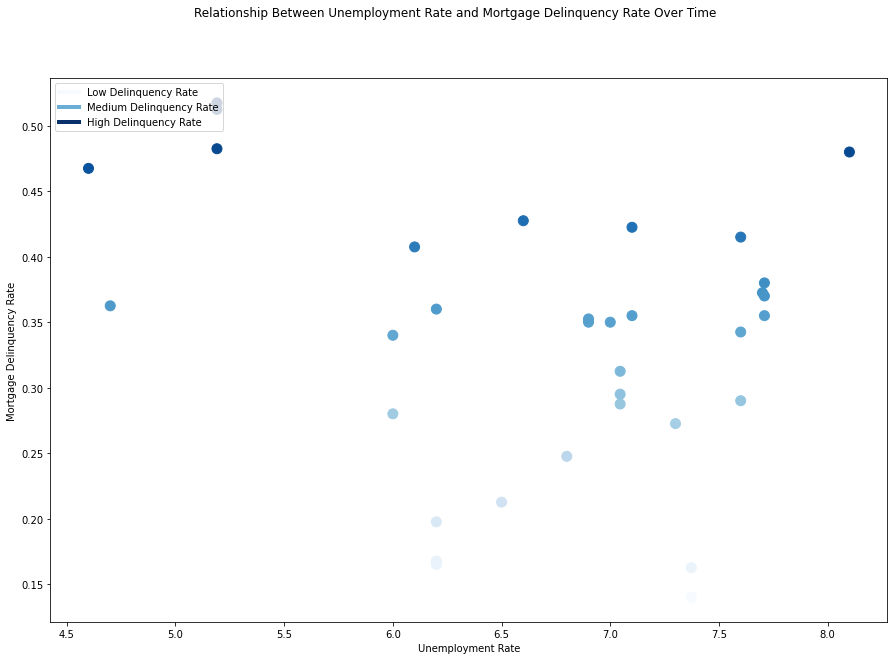

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

plt.figure(figsize=(15, 10))
# Create a color map based on the "Mortgage Delinquency Rate" column
colors = final_cleaned_dataset['Mortgage_delinquency_rate']
cmap = plt.cm.get_cmap('Blues')

# Plot the scatter plot with the color map
plt.scatter(final_cleaned_dataset['Unemployment_Rate'], final_cleaned_dataset['Mortgage_delinquency_rate'], c=colors, cmap=cmap, s=100)

# Add labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Mortgage Delinquency Rate')
plt.suptitle('Relationship Between Unemployment Rate and Mortgage Delinquency Rate Over Time')

# Create a custom legend
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

plt.legend(custom_lines, ['Low Delinquency Rate', 'Medium Delinquency Rate', 'High Delinquency Rate'], loc='upper left')

# Add hover information to show the values for Unemployment Rate and Mortgage Delinquency Rate
def show_values_on_hover(event):
    for idx, point in enumerate(event.artist.get_offsets()):
        x, y = point.xdata, point.ydata
        annot = plt.annotate("(%.2f, %.2f)" % (x, y),
                             (x, y),
                             textcoords="offset points",
                             xytext=(-15,-10),
                             ha='center',
                             fontsize=8,
                             bbox=dict(boxstyle="round,pad=0.3",
                                       fc="yellow", alpha=0.5),
                             arrowprops=dict(arrowstyle="->",
                                             connectionstyle="arc3,rad=0"))
        annot.set_visible(True)
    plt.draw()

plt.gcf().canvas.mpl_connect("motion_notify_event", show_values_on_hover)

# Show the plot
plt.show()

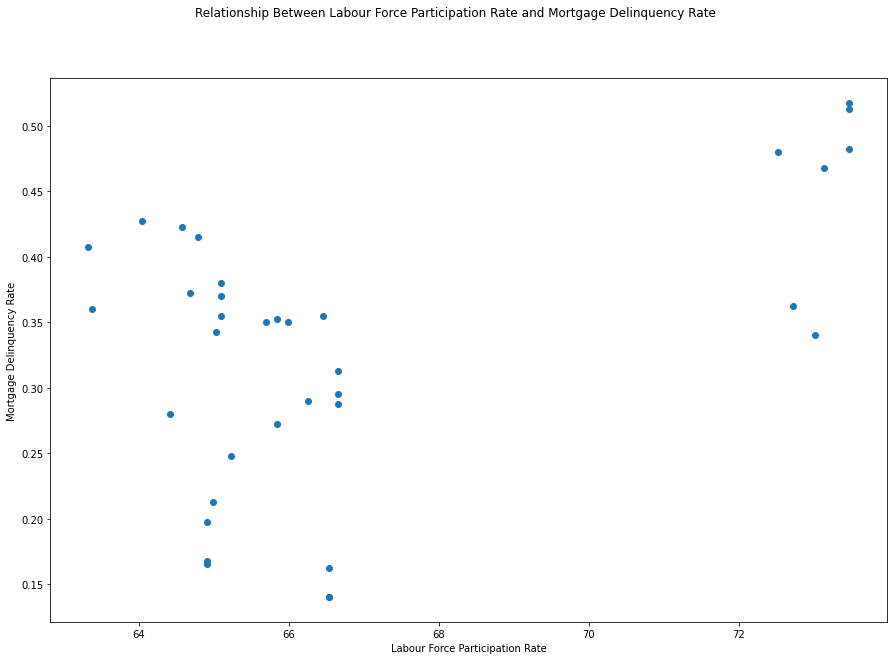

In [17]:
plt.figure(figsize=(15, 10))
# Create a scatter plot
plt.scatter(final_cleaned_dataset['Labour_Force_Participation_Rate'], final_cleaned_dataset['Mortgage_delinquency_rate'])

# Add labels and title
plt.xlabel('Labour Force Participation Rate')
plt.ylabel('Mortgage Delinquency Rate')
plt.suptitle('Relationship Between Labour Force Participation Rate and Mortgage Delinquency Rate')

# Show the plot
plt.show()

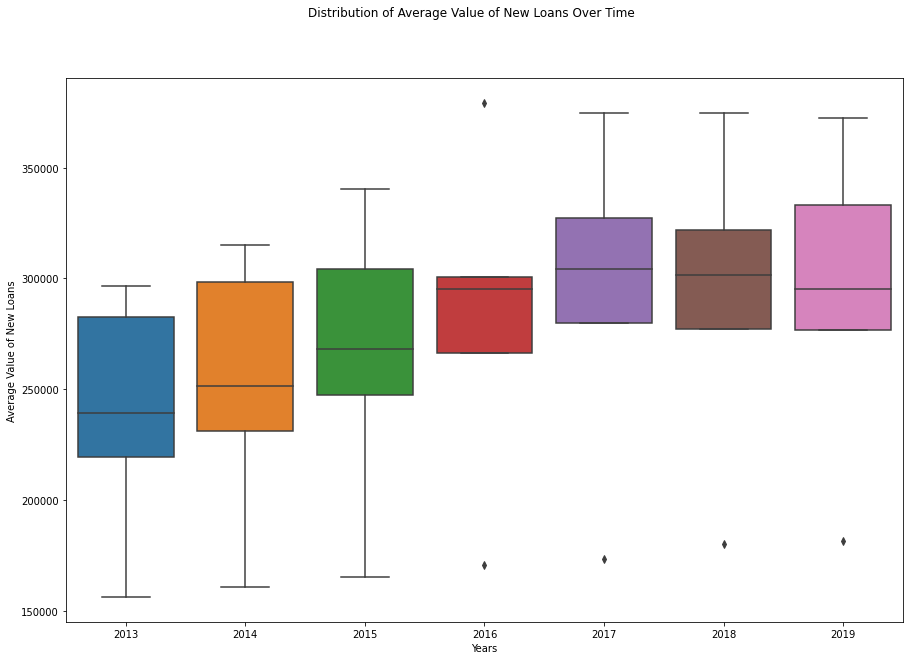

In [18]:
# Plot the box plot

plt.figure(figsize= (15,10))
sns.boxplot( x=final_cleaned_dataset['Years'], y=final_cleaned_dataset['Average_Value_New_Loans'])

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Average Value of New Loans')
plt.suptitle('Distribution of Average Value of New Loans Over Time')


# Show the plot
plt.show()

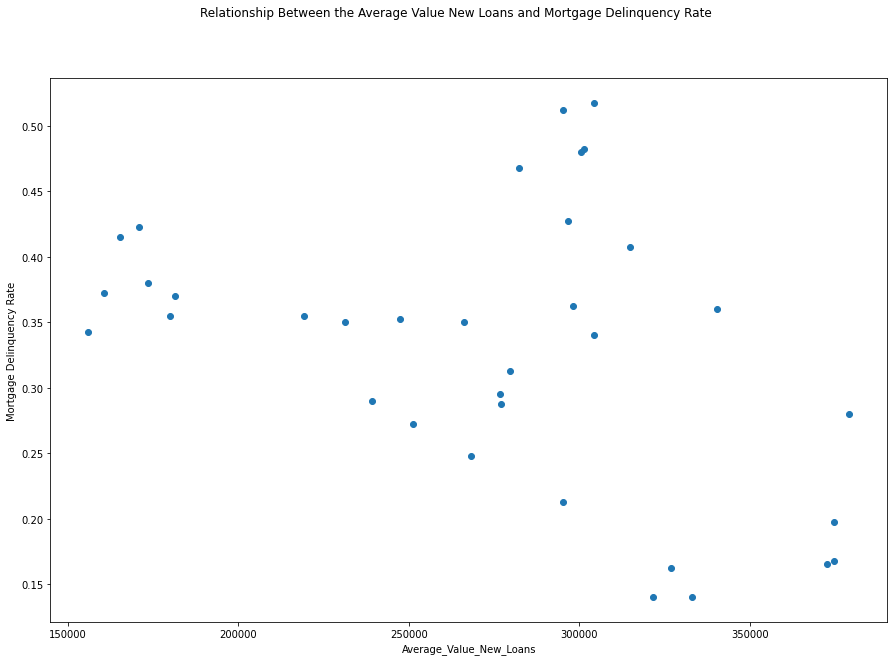

In [19]:
plt.figure(figsize=(15, 10))
# Create a scatter plot
plt.scatter(final_cleaned_dataset['Average_Value_New_Loans'], final_cleaned_dataset['Mortgage_delinquency_rate'])

# Add labels and title
plt.xlabel('Average_Value_New_Loans')
plt.ylabel('Mortgage Delinquency Rate')
plt.suptitle('Relationship Between the Average Value New Loans and Mortgage Delinquency Rate')

# Show the plot
plt.show()

In [23]:
# Import the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(final_cleaned_dataset.drop(['Mortgage_delinquency_rate'], axis=1))

# Split the features and target
X = features_scaled
y = target = final_cleaned_dataset['Mortgage_delinquency_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
# Import the necessary libraries
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Fit the linear regression model to the train set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate the mean squared error for the train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate the R-squared for the train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Train Mean Squared Error:", round(train_mse, 5))
print("Test Mean Squared Error:", round(test_mse, 5))
print("Train R-Squared:", round(train_r2, 5))
print("Test R-Squared:", round(test_r2, 5))

# Calculate the difference between the train and test R-squared values
r2_difference = np.abs(train_r2 - test_r2)

# Print the difference
print("R-Squared Difference:", round(r2_difference, 5))



Train Mean Squared Error: 0.0003
Test Mean Squared Error: 0.00075
Train R-Squared: 0.96673
Test R-Squared: 0.95321
R-Squared Difference: 0.01352


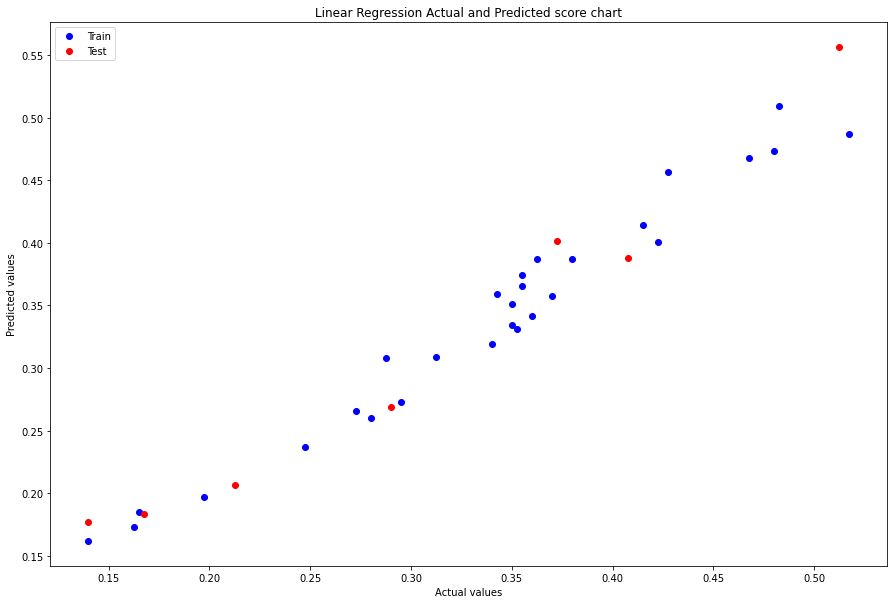

In [40]:

import matplotlib.pyplot as plt

# Fit the linear regression model to the train set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate the mean squared error for the train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate the R-squared for the train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Plot the predicted vs actual values for train and test sets
plt.figure(figsize=(15,10))
plt.plot(y_train, y_train_pred, 'ro', label="Train", color='blue')
plt.plot(y_test, y_test_pred, 'ro', label="Test", color='red')


# Add labels, title, and legend
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear Regression Actual and Predicted score chart")
plt.legend(loc='best')

# Show the plot
plt.show()


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
# Create the model object
rfr = RandomForestRegressor()

# Fit the model to your training data
rfr.fit(X_train, y_train)

# Predict values for your training data
y_train_pred = rfr.predict(X_train)

# Predict values for your test data
y_test_pred = rfr.predict(X_test)

# Calculate the mean absolute error for the training data
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calculate the mean squared error for the training data
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate the root mean squared error for the training data
train_rmse = np.sqrt(train_mse)

# Calculate the R-squared score for the training data
train_r2 = r2_score(y_train, y_train_pred)

# Calculate the mean absolute error for the testing data
test_mae = mean_absolute_error(y_test, y_test_pred)

# Calculate the mean squared error for the testing data
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate the root mean squared error for the testing data
test_rmse = np.sqrt(test_mse)

# Calculate the R-squared score for the testing data
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Train Mean Absolute Error:", round(train_mae, 3))
print("Test Mean Absolute Error:", round(test_mae, 3))
print("Train Mean Squared Error:", round(train_mse, 3))
print("Test Mean Squared Error:", round(test_mse, 3))
print("Train Root Mean Squared Error:", round(train_rmse, 3))
print("Test Root Mean Squared Error:", round(test_rmse, 3))
print("Train R-Squared:", round(train_r2, 3))
print("Test R-Squared:", round(test_r2, 3))

# Calculate the difference between the train and test R-squared values
r2_difference = np.abs(train_r2 - test_r2)

# Print the difference
print("R-Squared Difference:", round(r2_difference, 3))



Train Mean Absolute Error: 0.007
Test Mean Absolute Error: 0.021
Train Mean Squared Error: 0.0
Test Mean Squared Error: 0.001
Train Root Mean Squared Error: 0.009
Test Root Mean Squared Error: 0.025
Train R-Squared: 0.992
Test R-Squared: 0.927
R-Squared Difference: 0.065


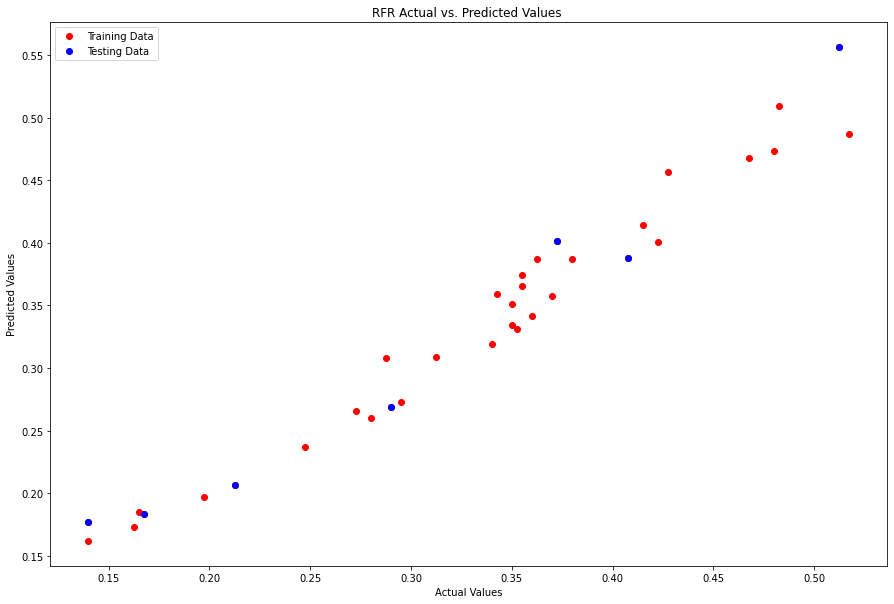

In [39]:
import matplotlib.pyplot as plt

# Combine the training and testing data
y_actual = np.concatenate((y_train, y_test))
y_predicted = np.concatenate((y_train_pred, y_test_pred))

# Plot the actual vs. predicted values
plt.figure(figsize=(15,10))
plt.plot(y_actual, y_predicted, 'o', color='red', label='Training Data')
plt.plot(y_test, y_test_pred, 'o', color='blue', label='Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RFR Actual vs. Predicted Values ')
plt.legend()
plt.show()

                                  feature  importance
7      Residential_Mortgage_Arrears_Rates    0.834594
3         Labour_Force_Participation_Rate    0.042404
1            Real_Median_Household_Income    0.038762
6                 Average_Value_New_Loans    0.033341
5  Real_Disposable_Income_Percent_Change     0.020261
0                                   Years    0.011418
2     Consumer_Price_Index_Percent_Change    0.011193
4                       Unemployment_Rate    0.008027


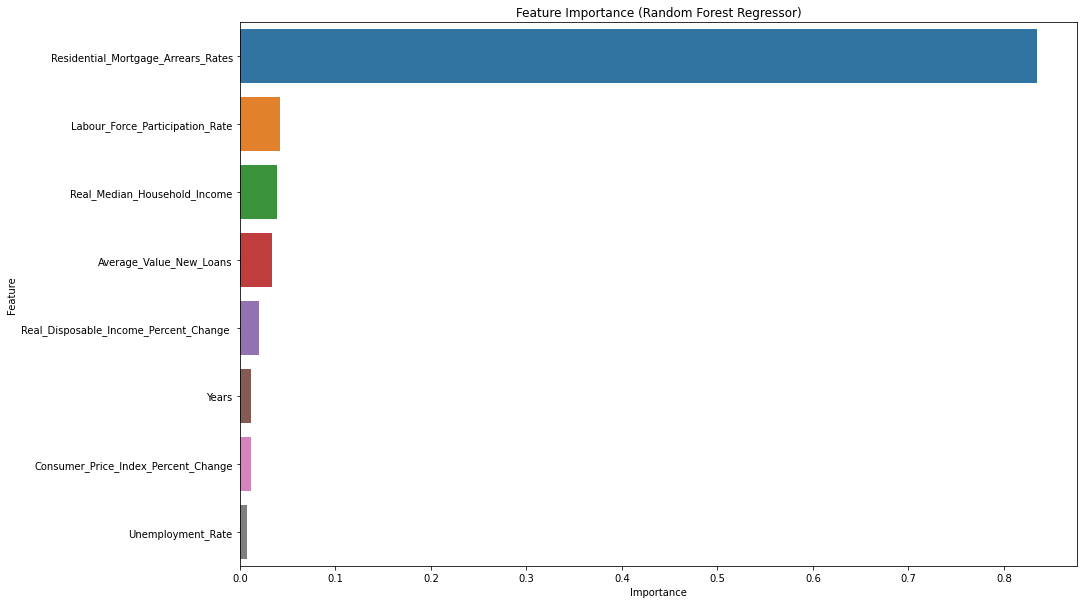

In [33]:
# Create a feature importance DataFrame
feature_importance = pd.DataFrame({"feature": X.columns, "importance": importance})

# Sort the feature importance DataFrame by the importance values
feature_importance.sort_values(by="importance", ascending=False, inplace=True)

# Print the feature importance values
print(feature_importance)

# Plot the feature importance values
plt.figure(figsize=(15,10))
sns.barplot(x=feature_importance["importance"], y=feature_importance["feature"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest Regressor)")
plt.show()

In [32]:
# Split the input data into features and target
X = final_cleaned_dataset.drop(['Mortgage_delinquency_rate'], axis=1)
y = final_cleaned_dataset['Mortgage_delinquency_rate']

# Convert features to a pandas DataFrame
features_df = pd.DataFrame(X, columns=X.columns)

# Extract the feature importance values
importance = rfr.feature_importances_

In [34]:
# Drop the 'Years','Labour_Force_Participation_Rate','Unemployment_Rate','Residential_Mortgage_Arrears_Rates'features
features_df = final_cleaned_dataset.drop(['Years', 'Labour_Force_Participation_Rate', 'Unemployment_Rate', 'Residential_Mortgage_Arrears_Rates' ], axis=1)

In [36]:
# Scale the features using StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(final_cleaned_dataset.drop(['Mortgage_delinquency_rate'], axis=1))

# Split the data into features and target
target = final_cleaned_dataset['Mortgage_delinquency_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model on the training data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Make predictions on the testing data
y_test_pred = model.predict(X_test)

# Calculate the training R-squared score
r2_train = r2_score(y_train, y_train_pred)

# Calculate the testing R-squared score
r2_test = r2_score(y_test, y_test_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_test_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_test_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the results
print("Train R-Squared:", round(r2_train, 3))
print("Test R-Squared:", round(r2_test, 3))
print("R-Squared Difference:", round(r2_train - r2_test, 3))
print("Mean Absolute Error:", round(mae, 3))
print("Mean Squared Error:", round(mse, 3))
print("Root Mean Squared Error:", round(rmse, 3))



Train R-Squared: 0.992
Test R-Squared: 0.923
R-Squared Difference: 0.068
Mean Absolute Error: 0.032
Mean Squared Error: 0.001
Root Mean Squared Error: 0.035


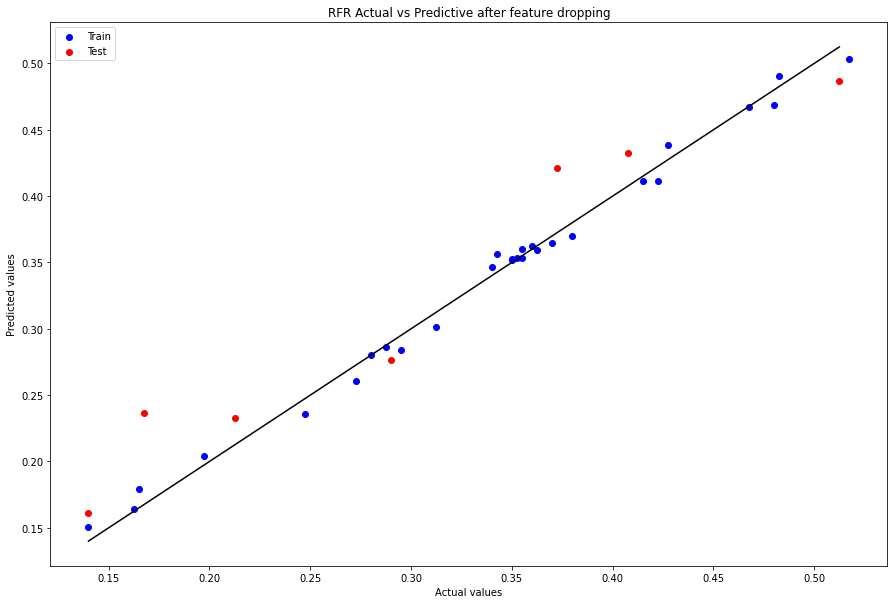

In [41]:
import matplotlib.pyplot as plt

# Fit the random forest model to the train set
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(15,10))

# Plot the predicted vs actual values for train and test sets
plt.scatter(y_train, y_train_pred, label="Train", color='blue')
plt.scatter(y_test, y_test_pred, label="Test", color='red')

# Plot a line that represents perfect predictions

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black')

# Add labels, title, and legend
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("RFR Actual vs Predictive after feature dropping")
plt.legend(loc='best')

# Show the plot
plt.show()



